In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from plotters import plot_surface, plot_surface_3D, make_surface_grid
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

# Lectura de datos

In [2]:
!ls

MD
NNs
Plano_xOy.ipynb
RS
__pycache__
nmodes.ipynb
nmodes.xlsx
plotters.py
read_configxyz.ipynb
read_traj.ipynb
slabmotion
systemdata.in


In [3]:
data = pd.read_csv('systemdata.in', skiprows=17,header=None,delim_whitespace=True)
data.drop(columns=[3,4,5,6], inplace=True)
data.rename({0:'x', 
             1:'y',
             2:'z',
             7:'capa'},
             axis=1, 
             inplace=True)
data.capa = data.capa.fillna(0)
data.capa = data.capa.astype('int')
data.tail()
Atomos_Pt_capa1_4 = data.query('capa < 5 & capa != 0')

# Graficas 2D

<Axes: xlabel='x', ylabel='y'>

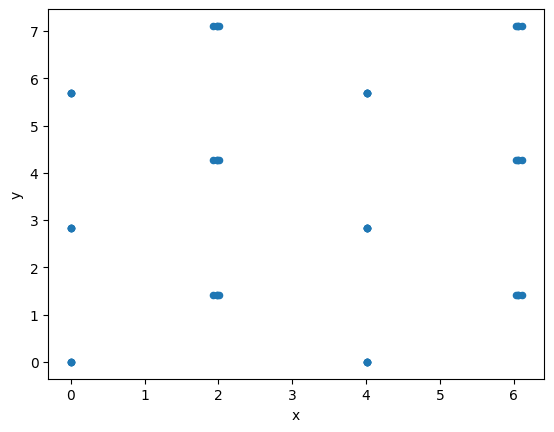

In [4]:
data.query('capa != 0').plot(kind='scatter',x='x', y='y')

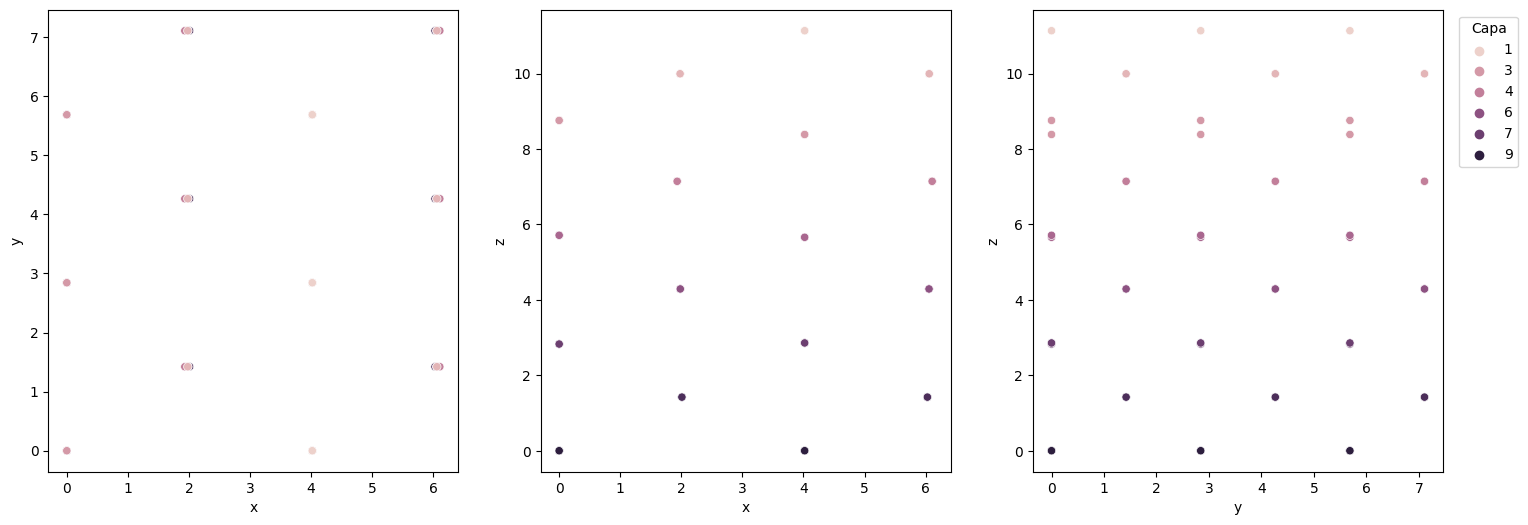

In [5]:
Pts = data.query('capa != 0')
fig, ax = plt.subplots(1,3, figsize= (18,6))

sns.scatterplot(data=Pts, x='x', y='y', hue='capa', ax=ax[0], legend=False)
sns.scatterplot(data=Pts, x='x', y='z', hue='capa', ax=ax[1], legend=False)
sns.scatterplot(data=Pts, x='y', y='z', hue='capa', ax=ax[2])
ax[2].legend(bbox_to_anchor=(1.2,1), title='Capa')

# Grafica plano de bragg

<Figure size 640x480 with 0 Axes>

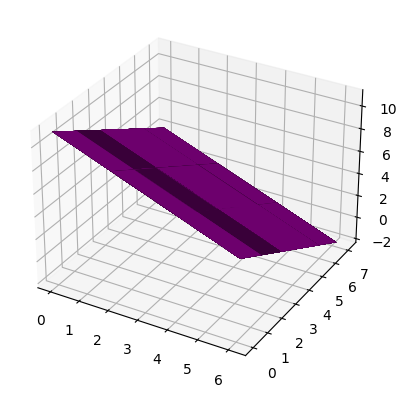

In [6]:
x_range = [4.01998, 4.01998, 4.01998, 0.00002, 0.00002, 0.00002, 1.93233, 6.10764, 1.93231, 6.10766, 1.93232, 6.10764, 
           4.01999, 4.01998, 4.01998, 0.00002, 0.00002, 0.00002, 1.98007, 6.05989, 1.98014, 6.05984, 1.98004, 6.05992, 4.01999, 4.01998, 4.01998]

y_range = [2.84255, -0.00001, 5.68514, 5.68519, 2.84252, -0.00003, 7.10641, 7.10641, 4.26384, 4.26385, 1.42128, 1.42128,
            2.84254, -0.00002, 5.68516, 5.68517, 2.84253, -0.00002, 1.42127, 1.42127, 4.26384, 4.26385, 7.10642, 7.10642, -0.00001, 2.84257, 5.68513]

x, y = np.meshgrid(x_range, y_range)
z = - (x + y) + 11.13486

fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(x, y, z,color='purple')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


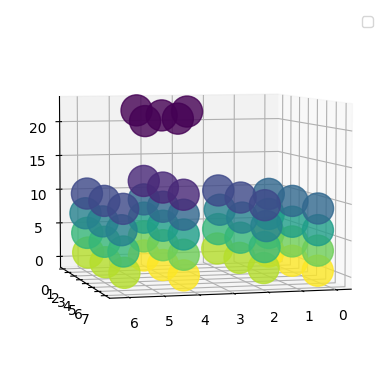

In [7]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(data['x'], 
           data['y'], 
           data['z'],
           c=data['capa'], 
           cmap='viridis', 
           s=500,
           alpha=0.8)
#ax.scatter(Atomos_Pt_capa1_4['x'] +8.04 , Atomos_Pt_capa1_4['y'] + 8.5277077811, Atomos_Pt_capa1_4['z'], c=Atomos_Pt_capa1_4['capa'], marker = 'x')
#plt.style.use('classic')
#ax.plot_surface(x, y, z,color='cyan', alpha=0.8, linestyle='--')
ax.view_init(5, 75)
ax.legend()
plt.show()

# Grafica 3D de la estructura de platino

NameError: name 'plot_surface_3D' is not defined

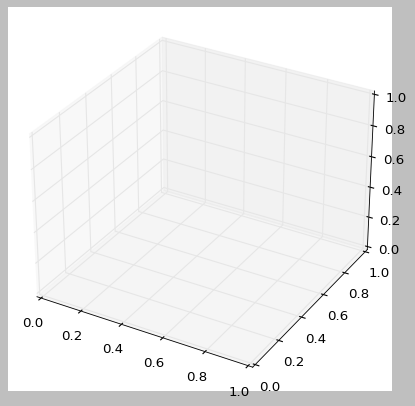

In [8]:
plt.style.use('classic')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some example data and plot a basic wireframe.
ax = plot_surface_3D(Atomos_Pt_capa1_4,ax)
ax.view_init(15, 75)
#ax.set_color_cycle(sns.color_palette("coolwarm_r",4))
#ax.set_
# Set the axis labels
#ax.set_zlim([4,15])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

<Axes: xlabel='x', ylabel='z'>

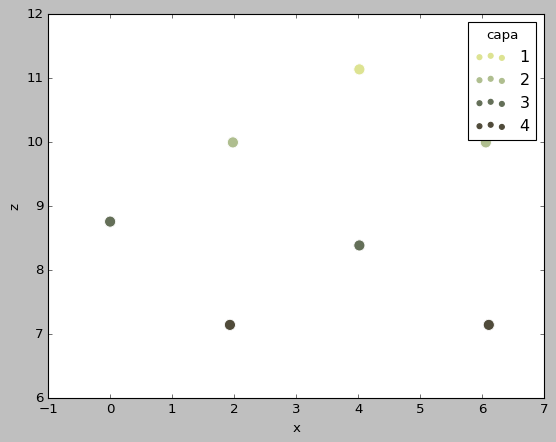

In [9]:
import seaborn as sns
paleta = {1:'#dde392',2: '#AFBE8F',3: '#646F58',4: '#504B3A'}
sns.scatterplot(x=Atomos_Pt_capa1_4['x'], y=Atomos_Pt_capa1_4['z'], hue=Atomos_Pt_capa1_4['capa'], s=100, palette=paleta)

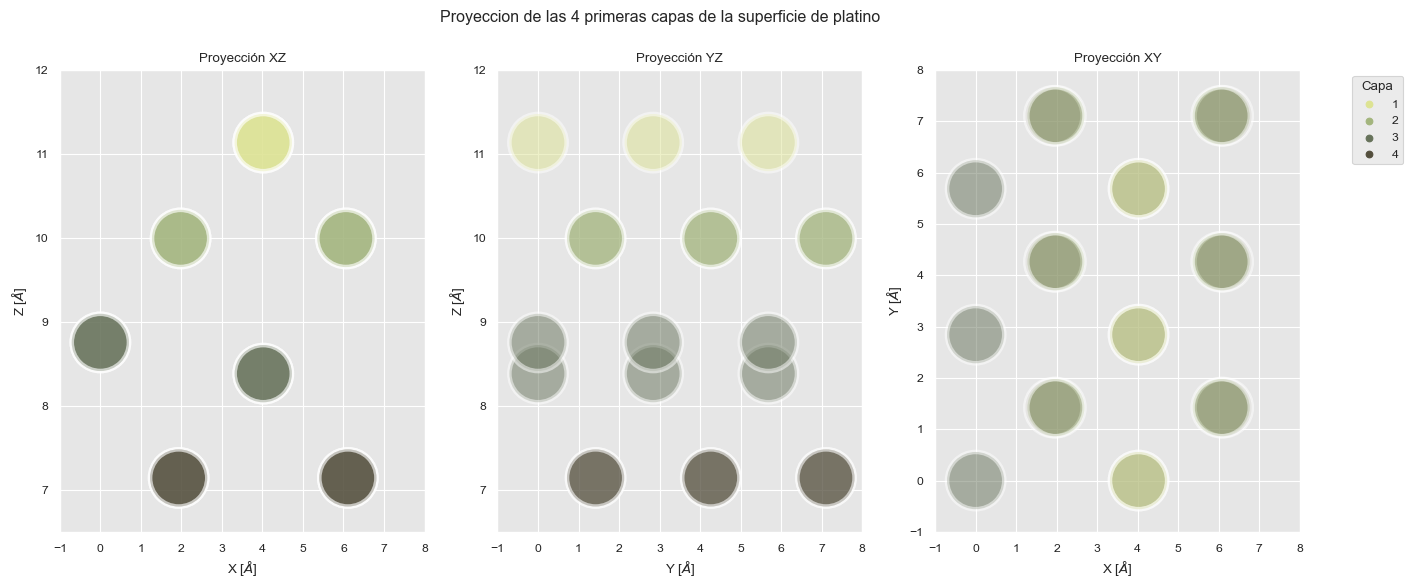

In [25]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
paleta = {1:'#dde392',2: '#A3B57D',3: '#66725A',4: '#534E3C'}
fig, ax = plt.subplots(1,3, figsize=(16,6))
fig.suptitle('Proyeccion de las 4 primeras capas de la superficie de platino')
sns.scatterplot(x=Atomos_Pt_capa1_4['x'], y=Atomos_Pt_capa1_4['z'], hue=Atomos_Pt_capa1_4['capa'], s=1700,alpha=0.5, palette=paleta, ax = ax[0], legend=False)
sns.scatterplot(x=Atomos_Pt_capa1_4['y'], y=Atomos_Pt_capa1_4['z'], hue=Atomos_Pt_capa1_4['capa'], s=1700,alpha=0.5, palette=paleta, ax = ax[1], legend=False)
sns.scatterplot(x=Atomos_Pt_capa1_4['x'], y=Atomos_Pt_capa1_4['y'], hue=Atomos_Pt_capa1_4['capa'], s=1700,alpha=0.5, palette=paleta, ax = ax[2])
ax[0].set_title('Proyección XZ')
ax[0].set_xlabel(f'X [$\AA$]')
ax[0].set_ylabel(f'Z [$\AA$]')
ax[0].set_xlim(-1,8)
ax[0].set_ylim(6.5,12)

ax[1].set_title('Proyección YZ')
ax[1].set_xlabel(f'Y [$\AA$]')
ax[1].set_ylabel(f'Z [$\AA$]')
ax[1].set_xlim(-1,8)
ax[1].set_ylim(6.5,12)

ax[2].set_title('Proyección XY')
ax[2].set_xlabel(f'X [$\AA$]')
ax[2].set_ylabel(f'Y [$\AA$]')
ax[2].set_xlim(-1,8)
ax[2].set_ylim(-1,8)
ax[2].legend(title='Capa', bbox_to_anchor=(1.3,1))
plt.show()

NameError: name 'plot_surface' is not defined

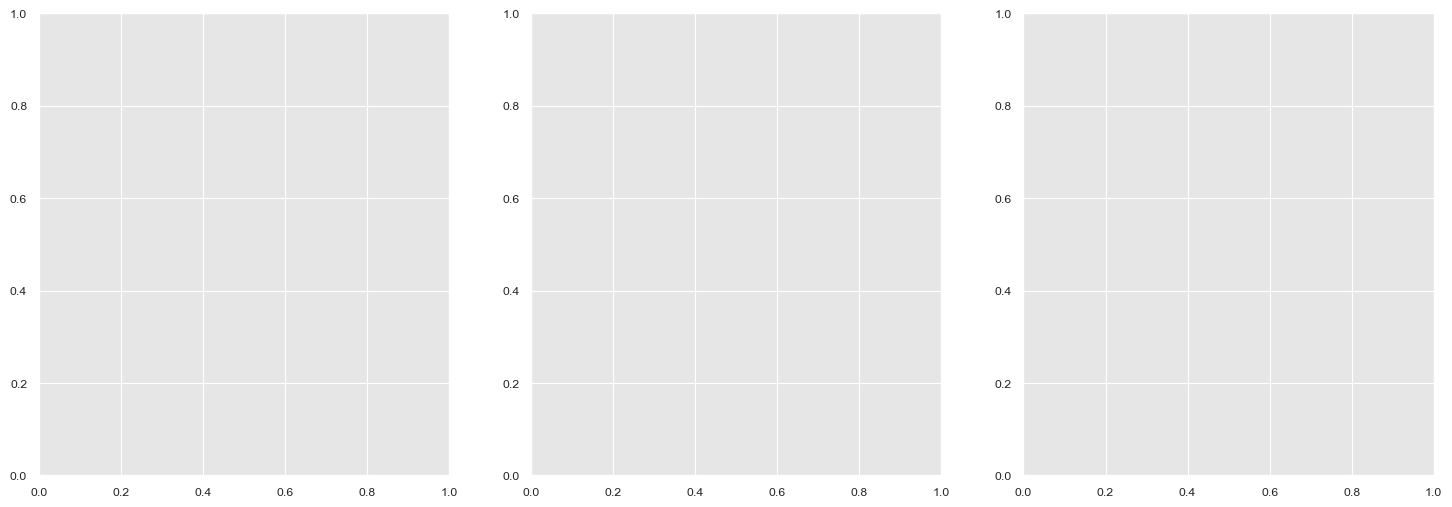

In [40]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0] = plot_surface(Atomos_Pt_capa1_4,'x','z',ax[0],leg=True)

ax[0].axvline(x=8.04, linestyle='--', c='r')
ax[0].axvline(x=0, linestyle='--', c='r')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Z')

ax[1] = plot_surface(Atomos_Pt_capa1_4,'y','z',ax[1])
ax[1].axvline(x=8.5277077811, linestyle='--', c='r')
ax[1].axvline(x=0, linestyle='--', c='r')
ax[1].set_xlabel('Y')
ax[1].set_ylabel('Z')
ax[2] = plot_surface(Atomos_Pt_capa1_4,'x','y',ax[2])
ax[2].axhline(y=8.5277077811, xmin=0.375, xmax=0.705,linestyle='--', c='r')
ax[2].axhline(y=0, xmin=0.375, xmax=0.705, linestyle='--', c='r')
ax[2].axvline(x=8.04, ymin=0.365, ymax=0.69, linestyle='--', c='r')
ax[2].axvline(x=0,ymin=0.365, ymax=0.69, linestyle='--', c='r')
ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')
plt.legend(bbox_to_anchor=(-1.5,1))
plt.show()

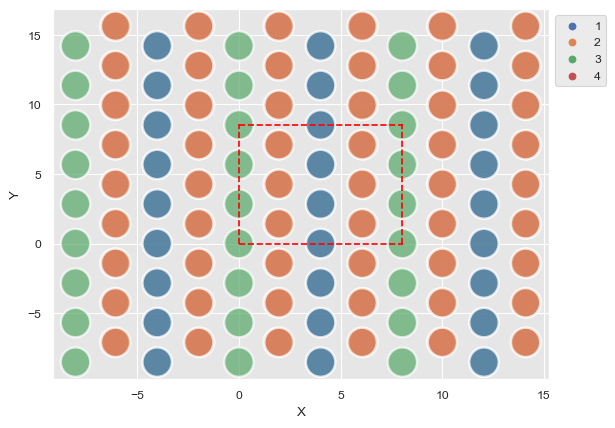

In [ ]:
from plotters import make_surface_grid
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = make_surface_grid(Atomos_Pt_capa1_4,ax)
plt.legend(bbox_to_anchor=(1,1))
plt.show()